<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Anamaly_Detection_of_ECG_Using_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models  import Model


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']= False

In [2]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip

--2020-10-29 15:50:14--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  2.61MB/s    in 3.9s    

2020-10-29 15:50:18 (2.61 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]



In [3]:
!unzip /content/ECG5000.zip

Archive:  /content/ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [4]:
!ls -alrt

total 36800
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip
-rw-r--r-- 1 root root       38 Aug  9  2019 ECG5000.txt
-rw-r--r-- 1 root root  7086857 Aug  9  2019 ECG5000_TEST.arff
-rw-r--r-- 1 root root  1128500 Aug  9  2019 ECG5000_TRAIN.txt
-rw-r--r-- 1 root root   790229 Aug  9  2019 ECG5000_TRAIN.arff
-rw-r--r-- 1 root root 10156500 Aug  9  2019 ECG5000_TEST.txt
-rw-r--r-- 1 root root  7083409 Aug  9  2019 ECG5000_TEST.ts
-rw-r--r-- 1 root root   786781 Aug  9  2019 ECG5000_TRAIN.ts
drwxr-xr-x 1 root root     4096 Oct 14 16:31 sample_data
drwxr-xr-x 1 root root     4096 Oct 23 16:14 .config
drwxr-xr-x 1 root root     4096 Oct 29 15:44 ..
drwxr-xr-x 1 root root     4096 Oct 29 15:50 .


In [5]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [6]:
!head ecg_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [7]:
df= pd.read_csv('ecg_final.txt',sep='  ',header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,...,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,...,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,...,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,...,1.553079,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,...,0.982230,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.1

In [9]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [10]:
df=df.add_prefix('c')

In [11]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [12]:
df['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [13]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,...,c101,c102,c103,c104,c105,c106,c107,c108,c109,c110,c111,c112,c113,c114,c115,c116,c117,c118,c119,c120,c121,c122,c123,c124,c125,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,-0.936082,-0.586326,-0.434430,-0.337621,-0.258235,-0.184443,-0.120015,-0.070396,-0.041849,-0.037049,-0.041243,-0.048908,-0.060176,-0.070725,-0.085491,-0.101144,-0.116070,-0.134461,-0.155811,-0.177542,-0.200685,-0.224244,-0.246686,-0.271476,-0.290321,-0.304461,-0.315111,-0.316851,-0.313070,-0.303238,...,0.946527,1.051337,1.138071,1.187551,1.201909,1.190866,1.154605,1.086347,0.986863,0.864419,0.720300,0.570000,0.428955,0.319734,0.242586,0.181059,0.134708,0.109781,0.093630,0.081028,0.065780,0.047326,0.025409,0.004531,-0.009790,-0.019087,-0.026208,-0.029561,0.000637,0.086588,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,0.657945,0.592049,0.493606,0.426206,0.393553,0.382488,0.386315,0.400830,0.415267,0.423797,0.429734,0.434976,0.441768,0.447727,0.454600,0.461603,0.472726,0.483574,0.492048,0.503468,0.516169,0.530030,0.543061,0.552285,0.560649,0.564906,0.566459,0.560789,0.548964,0.536229,...,0.520027,0.574633,0.614855,0.623050,0.608319,0.582721,0.553923,0.531272,0.507226,0.485600,0.483479,0.511334,0.546391,0.565580,0.571998,0.573798,0.584480,0.589680,0.591613,0.597117,0.603953,0.610288,0.619812,0.633101,0.649239,0.667657,0.680713,0.693871,0.751844,0.920052,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,-4.040526,-3.724538,-3.264576,-3.222345,-3.263484,-3.219212,-3.202187,-3.147504,-3.459917,-4.102102,-4.311241,-4.099888,-3.614973,-3.822298,-3.795567,-3.690817,-3.542485,-3.631665,-3.587112,-3.452215,-4.074752,-4.137454,-4.059662,-3.626646,-2.829471,-3.585866,-4.003401,-3.900724,-3.325329,...,-2.662170,-2.634950,-2.634768,-2.591663,-2.446476,-2.234175,-2.431403,-2.681604,-2.864706,-3.415656,-3.497624,-3.091282,-2.608510,-2.383204,-2.678883,-3.305661,-3.179590,-3.311559,-3.501555,-4.007212,-4.199563,-3.335678,-3.127603,-3.042532,-3.116177,-3.972320,-4.754057,-4.290016,-3.802469,-4.014642,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,-1.362068,-0.935730,-0.704797,-0.557938,-0.457267,-0.392099,-0.346567,-0.329879,-0.332123,-0.342879,-0.359587,-0.373523,-0.392615,-0.415157,-0.441247,-0.470702,-0.501586,-0.538227,-0.570103,-0.616792,-0.650610,-0.695386,-0.735151,-0.770997,-0.799982,-0.8121

In [14]:
train_data,test_data,train_labels,test_labels=train_test_split(df.values,df.values[:,0:1],test_size=0.2,random_state=111)

In [15]:
scaler= MinMaxScaler()
data_scaled=scaler.fit(train_data)

In [16]:
train_data_scaled=data_scaled.transform(train_data)
test_data_scaled= data_scaled.transform(test_data)

In [17]:
normal_train_data= pd.DataFrame(train_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
anamoly_train_data= pd.DataFrame(train_data_scaled).add_prefix('c').query('c0>0').values[:,1:]

In [18]:
normal_test_data= pd.DataFrame(test_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
anamoly_test_data= pd.DataFrame(test_data_scaled).add_prefix('c').query('c0>0').values[:,1:]

In [20]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2356, 140)
(563, 140)


In [21]:
print(anamoly_train_data.shape)
print(anamoly_test_data.shape)

(1644, 140)
(437, 140)


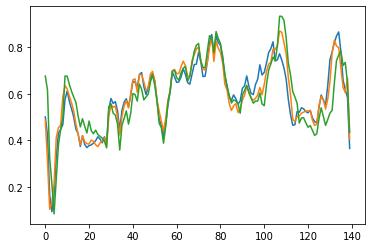

In [22]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

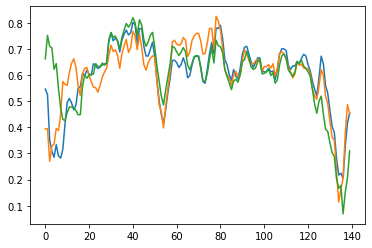

In [23]:
plt.plot(anamoly_train_data[0])
plt.plot(anamoly_train_data[1])
plt.plot(anamoly_train_data[2])

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(140,activation='sigmoid'))

In [46]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder,self).__init__()
    self.encoder= tf.keras.Sequential([
                                       tf.keras.layers.Dense(64,activation='relu'),
                                       tf.keras.layers.Dense(32,activation='relu'),
                                       tf.keras.layers.Dense(16,activation='relu'),
                                       tf.keras.layers.Dense(8,activation='relu')
                                       ])
    self.decoder= tf.keras.Sequential([
                                       tf.keras.layers.Dense(16,activation='relu'),
                                       tf.keras.layers.Dense(32,activation='relu'),
                                       tf.keras.layers.Dense(64,activation='relu'),
                                       tf.keras.layers.Dense(140,activation='sigmoid')
                                       ])
  def call(self,x):
    encoded = self.encoder(x)
    decoded= self.decoder(encoded)
    return decoded


In [47]:
model = AutoEncoder()
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         patience=2,
                                                         mode= 'min')
model.compile(optimizer='adam', loss='mae')

In [48]:
history = model.fit(normal_train_data,normal_train_data,
                    epochs=50,
                    batch_size=128,
                    validation_data=(train_data_scaled[:,1:],train_data_scaled[:,1:]),
                    shuffle=True,
                    callbacks=[early_stopping])


Epoch 1/50
19/19 [==============================] - 0s 10ms/step - loss: 0.1351 - val_loss: 0.1278
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 0.0885
Epoch 3/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0569 - val_loss: 0.0776
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0492 - val_loss: 0.0765
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0482 - val_loss: 0.0762
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0481 - val_loss: 0.0758
Epoch 7/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0480 - val_loss: 0.0754
Epoch 8/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0479 - val_loss: 0.0754
Epoch 9/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0477 - val_loss: 0.0749
Epoch 10/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.0747
Epoch 11/50
19/19 

In [49]:
encoder_out= model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [50]:
encoder_out.shape

(563, 8)

In [51]:
decoder_out.shape

(563, 140)

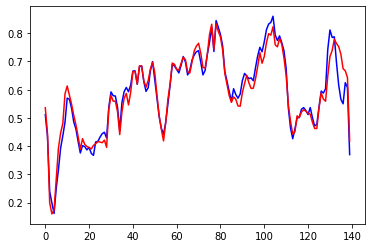

In [52]:
plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

In [53]:
encoder_out_a = model.encoder(anamoly_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

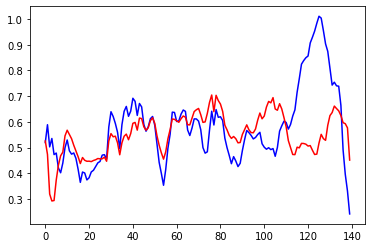

In [54]:
plt.plot(anamoly_test_data[0],'b')
plt.plot(decoder_out_a[0],'r')

In [55]:
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions,normal_test_data)

(array([ 8., 14., 26., 41., 30., 44., 30., 41., 36., 35., 25., 23., 25.,
        19., 18., 16., 10., 11., 16.,  5.,  7.,  9., 10.,  8.,  5.,  5.,
         9.,  3.,  3.,  3.,  4.,  0.,  3.,  3.,  2.,  2.,  1.,  1.,  1.,
         1.,  4.,  1.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.01256322, 0.01437546, 0.01618771, 0.01799995, 0.0198122 ,
        0.02162444, 0.02343669, 0.02524893, 0.02706118, 0.02887342,
        0.03068567, 0.03249791, 0.03431016, 0.0361224 , 0.03793465,
        0.03974689, 0.04155914, 0.04337138, 0.04518363, 0.04699587,
        0.04880812, 0.05062036, 0.05243261, 0.05424485, 0.0560571 ,
        0.05786934, 0.05968159, 0.06149383, 0.06330608, 0.06511833,
        0.06693057, 0.06874282, 0.07055506, 0.07236731, 0.07417955,
        0.0759918 , 0.07780404, 0.07961629, 0.08142853, 0.08324078,
        0.08505302, 0.08686527, 0.08867751, 0.09048976, 0.092302  ,
        0.09411425, 0.09592649, 0.09773874, 0.09955098, 0.10136323,
        0.10317547]),
 <a list of 50

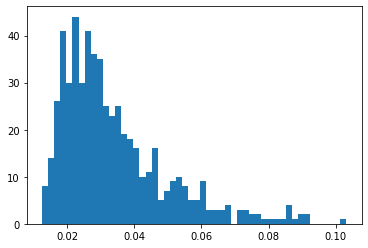

In [56]:
plt.hist(train_loss, bins=50)

In [58]:
np.mean(train_loss)

0.0338877354668489

In [59]:
np.std(train_loss)

0.015942190551068033

In [60]:
threshold =np.mean(train_loss) + 2*np.std(train_loss)

In [61]:
threshold

0.06577211656898496

In [62]:
reconstructions_a = model.predict(anamoly_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a,anamoly_test_data)


(array([ 1.,  0.,  0.,  1.,  0.,  0.,  2.,  3.,  1.,  0.,  5.,  7., 14.,
        23., 22., 46., 56., 45., 56., 46., 29., 34., 17.,  9.,  3.,  2.,
         1.,  2.,  0.,  2.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  2.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.04661109, 0.04943892, 0.05226675, 0.05509458, 0.05792242,
        0.06075025, 0.06357808, 0.06640591, 0.06923375, 0.07206158,
        0.07488941, 0.07771724, 0.08054508, 0.08337291, 0.08620074,
        0.08902857, 0.0918564 , 0.09468424, 0.09751207, 0.1003399 ,
        0.10316773, 0.10599557, 0.1088234 , 0.11165123, 0.11447906,
        0.1173069 , 0.12013473, 0.12296256, 0.12579039, 0.12861823,
        0.13144606, 0.13427389, 0.13710172, 0.13992956, 0.14275739,
        0.14558522, 0.14841305, 0.15124088, 0.15406872, 0.15689655,
        0.15972438, 0.16255221, 0.16538005, 0.16820788, 0.17103571,
        0.17386354, 0.17669138, 0.17951921, 0.18234704, 0.18517487,
        0.18800271]),
 <a list of 50

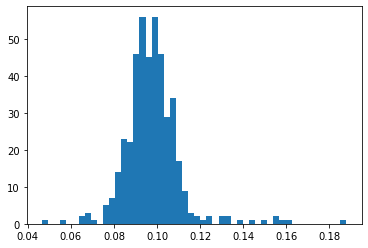

In [63]:
plt.hist(train_loss_a,bins=50)

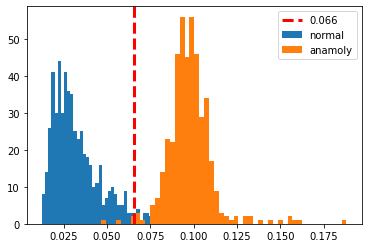

In [65]:
plt.hist(train_loss,bins=50,label='normal')
plt.hist(train_loss_a,bins=50,label='anamoly')
plt.axvline(threshold,color='r', linewidth=3,linestyle='dashed', label='{:0.3f}'.format(threshold))

plt.legend(loc='upper right')
plt.show()

In [66]:
np.mean(train_loss_a)

0.09773112307149534

In [67]:
np.std(train_loss_a)

0.013187516607035458

In [68]:
tf.math.less(train_loss,threshold)

<tf.Tensor: shape=(563,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [71]:
preds=tf.math.less(train_loss,threshold)

In [72]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=534>

In [73]:
preds.shape

TensorShape([563])

In [74]:
preds_a= tf.math.greater(train_loss_a,threshold)

In [75]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=433>

In [76]:
preds_a.shape

TensorShape([437])